<a href="https://colab.research.google.com/github/Mananpatel25/nlp-assignments/blob/main/Manan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('quotes.csv')

In [ ]:
# Group by author and concatenate quotes
author_quotes = data.groupby('author')['quote'].apply(lambda x: ' '.join(x)).reset_index()

# Print unique author names
print(author_quotes['author'].unique())

# Display the combined quotes for each author (optional)
author_quotes

[' '
 '  everything starts with him. To all the boys I used to kiss—  everything stops with his.'
 '  where books are burnt human-beings will be burnt in the end' ...
 "黃玉華, Three Cups of Tea: One Man's Mission to Promote Peace ... One School at a Time"
 '미프진판매 홈피:bbh.ow.to  ✉✉✉카톡:EEE388 텔레:EEE388' '티아']


,author,quote
0,,Les hommes construisent trop de murs et pas as...
1,everything starts with him. To all the boys ...,His Kiss:He has me at his every whim
2,where books are burnt human-beings will be b...,This was but a prelude
3,'Ego' is whatever within you stops you taking...,God' is whatever is the next obvious step towa...
4,'Tis wise to learn: 'tis God-like to create!,Tis well to borrow from the good and the great
...,...,...
117291,東山翔,"Yeah, a truly wonderful movie. I could feel my..."
117292,"顾漫, 微微一笑很倾城 [Just One Smile Is Very Alluring]","Real life wasn’t a game. In a game, what is re..."
117293,"黃玉華, Three Cups of Tea: One Man's Mission to P...",If we try to resolve terrorism with military m...
117294,미프진판매 홈피:bbh.ow.to ✉✉✉카톡:EEE388 텔레:EEE388,"수면제판매,정품수면제,미프진카톡: EEE388 bbh.ow.to카톡: EEE388 ..."


In [ ]:
import re
from collections import Counter


def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = text.split()
    return words

def calculate_tf(words):
    word_counts = Counter(words)
    total_words = len(words)
    tf_dict = {}
    for word, count in word_counts.items():
      tf_dict[word] = count / total_words
    return tf_dict

def calculate_idf(documents):
  n_docs = len(documents)
  idf_dict = {}
  all_words = set()

  for doc in documents:
      all_words.update(doc)

  for word in all_words:
      count = sum(1 for doc in documents if word in doc)
      idf_dict[word] = np.log(n_docs / (count + 1))  # Add 1 to avoid division by zero

  return idf_dict

def calculate_tfidf(tf, idf):
    tfidf_dict = {}
    for word, value in tf.items():
        tfidf_dict[word] = value * idf[word]
    return tfidf_dict


authors = ['William Shakespeare', 'Albert Einstein', 'Jane Austen']  # Replace with your desired authors
author_data = author_quotes[author_quotes['author'].isin(authors)]

documents = []
for author, quote in zip(author_data['author'], author_data['quote']):
    processed_words = preprocess_text(quote)
    documents.append(processed_words)

# Calculate TF-IDF for each author
idf = calculate_idf(documents)

for i in range(len(author_data)):
    tf = calculate_tf(documents[i])
    tfidf = calculate_tfidf(tf, idf)
    sorted_tfidf = dict(sorted(tfidf.items(), key=lambda item: item[1], reverse=True))

    # Find top 2 most frequent words with at least 4 letters
    top_words = []
    count = 0
    for word, score in sorted_tfidf.items():
      if len(word) >= 4:
        top_words.append((word, score))
        count += 1
        if count == 2:
          break
    print(author_data['author'].iloc[i] + ":")
top_words

Albert Einstein:
Jane Austen:
William Shakespeare:


[('thou', 0.001006789495827741), ('hath', 0.0009293441499948378)]

In [ ]:
from gensim.models import Word2Vec

# Configuration 1
model1 = Word2Vec(documents, window=3, vector_size=50, negative=3, min_count=1, sg=1) # sg=1 for skip-gram

# Configuration 2
model2 = Word2Vec(documents, window=7, vector_size=150, negative=10, min_count=1, sg=1) # sg=1 for skip-gram

# Example:
print(model1.wv['great'])
print(model2.wv['great'])

[-0.04995836  0.05223152 -0.09683625 -0.02278308 -0.04384949 -0.05067583
  0.1383196   0.19086805 -0.16624773 -0.09713798  0.01287621 -0.19199076
  0.07147543  0.08356182 -0.01508173  0.06520119  0.09381403  0.07104778
 -0.2541095  -0.11592196  0.03898976  0.12120535  0.24564224 -0.04262957
  0.11151321 -0.04317861 -0.02289807  0.06051186 -0.14373925  0.04187462
 -0.02168734 -0.10614163 -0.03693577 -0.05026625 -0.08081042  0.04112829
  0.11817511  0.0407926   0.06839611 -0.12053726  0.08195882 -0.05858928
 -0.0178381   0.0269311   0.23801284  0.03168821 -0.13085304 -0.06026789
  0.13023272  0.07292201]
[-2.90916767e-02 -1.82785183e-01 -8.46595541e-02 -1.11445963e-01
 -4.64905612e-02 -8.18856433e-02 -8.18517655e-02  1.85625395e-03
 -9.52794328e-02  1.66496024e-01  1.72576942e-02 -7.83018097e-02
 -2.18568861e-01  1.60319120e-01 -2.10645907e-02  7.60067403e-02
  7.97459185e-02  1.67184085e-01  8.10688883e-02  2.91569382e-02
 -1.77449837e-01  9.50316971e-05  1.93046123e-01  1.01974599e-01


In [ ]:
print("Model 1 (window=3, vector_size=50, negative=3):")
print(model1.wv.most_similar(positive=["imagination"], topn=5))
print(model1.wv.similarity("fear", "knowledge"))

print("\nModel 2 (window=7, vector_size=150, negative=10):")
print(model2.wv.most_similar(positive=["imagination"], topn=5))
print(model2.wv.similarity("fear", "knowledge"))

Model 1 (window=3, vector_size=50, negative=3):
[('have', 0.9911922216415405), ('than', 0.9902426600456238), ('nothing', 0.9897440075874329), ('in', 0.9894652962684631), ('an', 0.98900306224823)]
0.97855425

Model 2 (window=7, vector_size=150, negative=10):
[('important', 0.9985021352767944), ('nothing', 0.9980775117874146), ('problem', 0.9979972839355469), ('manner', 0.9978875517845154), ('yet', 0.9978691935539246)]
0.9913396


Visualization for Model 1:


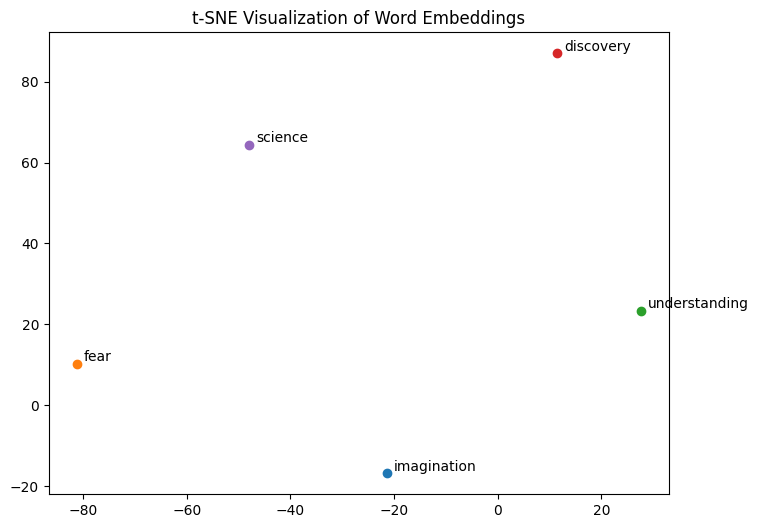


Visualization for Model 2:


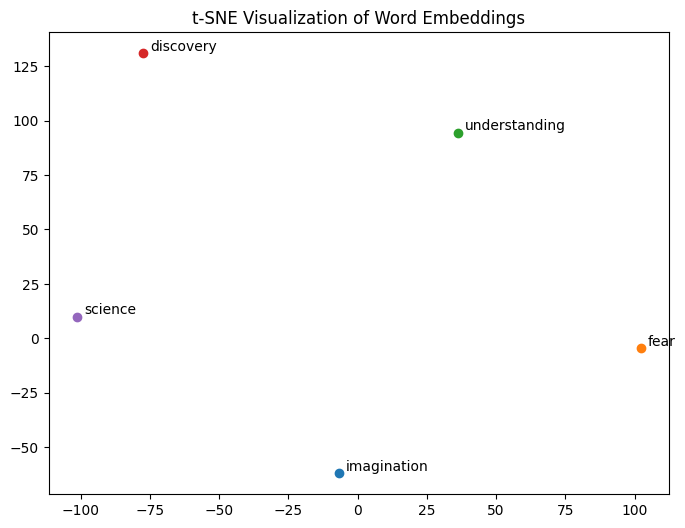

In [ ]:
from sklearn.manifold import TSNE

# Key words for visualization
key_words = ["imagination", "fear", "understanding", "discovery", "science"]

# Function to create TSNE visualization
def visualize_embeddings(model, key_words):
    embeddings = []
    labels = []
    for word in key_words:
        if word in model.wv:
            embeddings.append(model.wv[word])
            labels.append(word)

    # Convert the 'embeddings' list to a NumPy array
    embeddings = np.array(embeddings)

    # Check if there are enough embeddings for the given perplexity
    perplexity = min(5, len(embeddings) - 1) # Adjust perplexity if needed

    # If perplexity is 0, it means there's only one point; TSNE is not applicable.
    if perplexity == 0:
        print("Not enough data points for TSNE visualization.")
        return

    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        x, y = embeddings_2d[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
    plt.title("t-SNE Visualization of Word Embeddings")
    plt.show()


# Visualize for Model 1
print("Visualization for Model 1:")
visualize_embeddings(model1, key_words)


# Visualize for Model 2
print("\nVisualization for Model 2:")
visualize_embeddings(model2, key_words)